# 0. Becquerel

### Description


- Python 2/3 package
- Normal scientific Python distribution dependancies
  - Except `uncertainties` which is a quick `pip` install
 
 
### Installation

```bash
git clone https://github.com/lbl-anp/becquerel.git
cd becquerel
pip install -r requirements.txt
python setup.py install
```

### Distribution:

- Open source: https://github.com/lbl-anp/becquerel
- Modified (for UC Regents) [3 Clause BSD License](https://opensource.org/licenses/BSD-3-Clause) 
- <img src="https://upload.wikimedia.org/wikipedia/commons/b/bf/License_icon-bsd.svg" alt="BSD" style="width: 30px;" align="left"/>

### Contributors as of April 6, 2018:

- bplimley
- markbandstra
- thjoshi
- jccurtis
- chunhochow
- *alihanks*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import becquerel as bq

# Ideas:

Spectrum Class
- Reading
- add/sub (Spectrum)
- mul/div (scalar)


# 1. `bq.Spectrum`

The core class in `bq` is `Spectrum`. This contains a variety of tools for handling **single spectrum** data.

In [2]:
print(bq.Spectrum.__doc__)


    Represents an energy spectrum.

    Initialize a Spectrum directly, or with Spectrum.from_file(filename).

    Note on livetime:
      A livetime of None is the default for a counts-based spectrum, and
        indicates a missing or unknown livetime.
      A livetime of np.nan is the default for a CPS-based spectrum, and
        indicates that livetime is not a meaningful quantity for this type of
        spectrum.
      Either of these types of spectrum may be initialized with a livetime
        value. However, any operation that produces a CPS-based spectrum
        (such as a spectrum subtraction) will discard the livetime and set it
        to np.nan since livetime is then a meaningless quantity.
      Operations that produce a counts-based spectrum may or may not preserve a
        livetime value (for example, the sum of two spectra has a livetime
        equal to the sum of the two livetimes; but a scalar multiplication or
        division results in a livetime of None).

  

In [3]:
print(bq.Spectrum.__init__.__doc__)

Initialize the spectrum.

        Either counts or cps must be specified. Other args are optional.
        If start_time, stop_time, and realtime are being provided, only two of
        these should be specified as arguments, and the third will be
        calculated from the other two.

        See note on livetime in class docstring. As a reminder:
          livetime = None indicates a missing or unknown livetime, and may
            occur in a counts-based spectrum.
          livetime = np.nan indicates that livetime is not meaningful, and may
            occur in a CPS-based spectrum.

        Args:
          counts: counts per channel. array-like of ints, floats or UFloats
          cps: counts per second per channel. array-like of floats or UFloats
          uncs (optional): an iterable of uncertainty on the counts for each
            channel.
            If counts is given, is NOT a UFloat type, and uncs is not given,
            the uncertainties are assumed to be sqrt(N), with

## 1.1 Created from scratch

In [4]:
c, be = np.histogram(np.random.poisson(50, 1000), bins=np.arange(101))
spec = bq.Spectrum(counts=c, bin_edges_kev=be, livetime=60.)
spec

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       60.0
    num_channels:   100
    gross_counts:   1000+/-33
    gross_cps:      16.7+/-0.5
    filename:       None

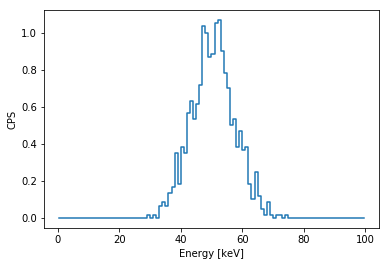

In [5]:
spec.plot()

## Calibration

In [4]:
spec.is_calibrated

True

In [ ]:
## Other methods

In [ ]:
spec.

# 1. Short examples

## 1a. Spectrum I/O

`becquerel` provides parsers for SPE, SPC, and CNF files:

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe
Line 16414 unknown:  $PRESETS:
Line 16415 unknown:  Live Time
Line 16416 unknown:  86400
Line 16417 unknown:  0
Start time: 2017-04-25 12:54:27
Stop time:  2017-04-25 17:30:24
Real time:  16557.0
Live time:  16543.0


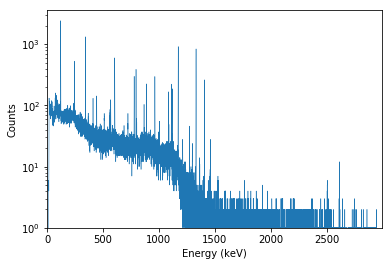

In [2]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')

print('Start time: {}'.format(spec.start_time))
print('Stop time:  {}'.format(spec.stop_time))
print('Real time:  {}'.format(spec.realtime))
print('Live time:  {}'.format(spec.livetime))

plt.figure()
plt.semilogy(spec.energies_kev, spec.counts_vals, lw=0.5)
plt.xlim(0, spec.energies_kev.max())
plt.ylim(1)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.show()

In [3]:
spec

becquerel.Spectrum
    start_time:     2017-04-25 12:54:27
    stop_time:      2017-04-25 17:30:24
    realtime:       16557.0
    livetime:       16543.0
    num_channels:   16384
    gross_counts:   (3.047+/-0.006)e+05
    gross_cps:      18.419+/-0.034
    filename:       ../tests/samples/1110C NAA cave pottery.Spe

## 1b. Source activity on a given date

Here's a check source activity on today's date:

In [3]:
ba133_chk = bq.IsotopeQuantity('ba133', date='2013-05-01', uci=10.02)
ba133_chk.uci_now()

7.24685817988332

Or for another date:

In [4]:
ba133_chk.uci_at('2018-02-16')

7.311855859452171

## 1c. Source lines and branching ratios

Here are the gamma-ray lines above 5% branching ratio from Co-60:

In [5]:
rad = bq.nndc.fetch_decay_radiation(nuc='Co-60', type='Gamma', i_range=(5, None))
cols = ['Z', 'Element', 'A', 'Decay Mode', 'Radiation', 'Radiation Energy (keV)',
        'Radiation Intensity (%)', 'Parent Energy Level (MeV)']
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Parent Energy Level (MeV)
0,27,CO,60,IT,G,6.915,9.1+/-0.4,0.058603+/-0.000007
1,27,CO,60,IT,G,6.93,18.0+/-0.8,0.058603+/-0.000007
2,27,CO,60,B-,G,1173.2280+/-0.0030,99.850+/-0.030,0
3,27,CO,60,B-,G,1332.492+/-0.004,99.9826+/-0.0006,0


## 1d. Isotope names and properties

In [6]:
i1 = bq.Isotope('Cs-137')
i2 = bq.Isotope('137CS')
i3 = bq.Isotope('Cs', 137)
i4 = bq.Isotope('Cesium-137')
i5 = bq.Isotope('137CAESIUM')
print(i1, i2, i3, i4, i5)
print(i1 == i2 == i3 == i4 == i5)

Cs-137 Cs-137 Cs-137 Cs-137 Cs-137
True


In [7]:
iso = bq.Isotope('Tc-99m')
print(iso)
print('{:%n(%s)-%a%m Z=%z}'.format(iso))
print('name:', iso.name)
print('symbol:', iso.symbol)
print('Z:', iso.Z)
print('A:', iso.A)
print('N:', iso.N)
print('m:', iso.m)
print('half-life: {:.2f} hr'.format(iso.half_life / 3600))

Tc-99m
Technetium(Tc)-99m Z=43
name: Technetium
symbol: Tc
Z: 43
A: 99
N: 56
m: m
half-life: 6.01 hr


## 1e. Cross section data for an element (Pb)

NIST XCOM data can be queried in `becquerel`:

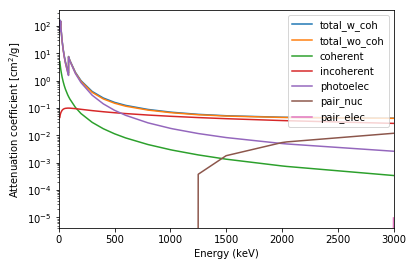

In [8]:
# query XCOM by element symbol
data = bq.xcom.fetch_xcom_data('Pb', e_range_kev=[10., 3000.])

plt.figure()
for field in ['total_w_coh', 'total_wo_coh', 'coherent', 'incoherent',
              'photoelec', 'pair_nuc', 'pair_elec']:
    plt.semilogy(data.energy, data[field], label=field)
plt.xlim(0, 3000)
plt.xlabel('Energy (keV)')
plt.ylabel(r'Attenuation coefficient [cm$^2$/g]')
plt.legend()
plt.show()

# 2. Longer examples

## 2a. Background subtraction

SpeFile: Reading file ../tests/samples/1110C NAA cave background May 2017.spe
Line 16403 unknown:  $PRESETS:
Line 16404 unknown:  None
Line 16405 unknown:  0
Line 16406 unknown:  0
Start time: 2017-04-26 11:05:11
Stop time:  2017-05-01 12:43:34
Real time:  437903.0
Live time:  437817.0
Total pottery countrate:    18.419+/- 0.034
Total background countrate:  2.405+/- 0.002
Total subtracted countrate: 16.014+/- 0.034


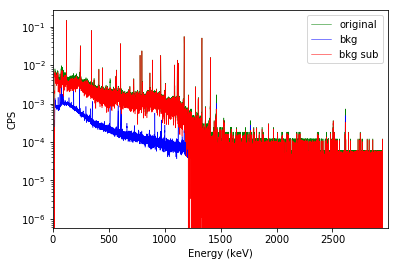

In [9]:
bkg = bq.Spectrum.from_file('../tests/samples/1110C NAA cave background May 2017.spe')
print('Start time: {}'.format(bkg.start_time))
print('Stop time:  {}'.format(bkg.stop_time))
print('Real time:  {}'.format(bkg.realtime))
print('Live time:  {}'.format(bkg.livetime))

print('Total pottery countrate:    {:6.3f}'.format(np.sum(spec.cps)))
print('Total background countrate: {:6.3f}'.format(np.sum(bkg.cps)))

bkgsub = spec - bkg
print('Total subtracted countrate: {:6.3f}'.format(np.sum(bkgsub.cps)))

plt.figure()
plt.semilogy(spec.energies_kev, spec.cps_vals, 'g-', lw=0.5, label='original')
plt.semilogy(bkg.energies_kev, bkg.cps_vals, 'b-', lw=0.5, label='bkg')
plt.semilogy(bkgsub.energies_kev, bkgsub.cps_vals, 'r-', lw=0.5, label='bkg sub')
plt.legend()
plt.xlim(0, spec.energies_kev.max())
plt.xlabel('Energy (keV)')
plt.ylabel('CPS')
plt.show()

Is there any Tl-208 in the background-subtracted spectrum?

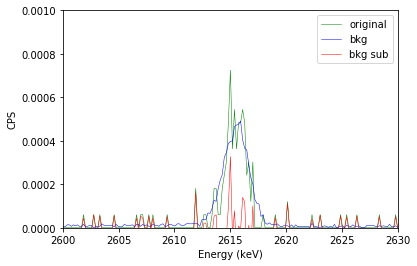

In [10]:
plt.figure()
plt.plot(spec.energies_kev, spec.cps_vals, 'g-', lw=0.5, label='original')
plt.plot(bkg.energies_kev, bkg.cps_vals, 'b-', lw=0.5, label='bkg')
plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-', lw=0.5, label='bkg sub')
plt.legend()
plt.xlim(2600, 2630)
plt.ylim(0, 0.001)
plt.xlabel('Energy (keV)')
plt.ylabel('CPS')
plt.show()

## 2b. Identifying unknown spectral lines

From the previous spectrum, we see a line around 1408 keV that is not in the background.

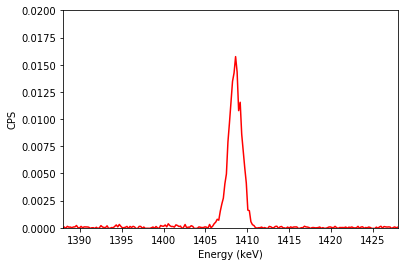

In [11]:
plt.figure()
plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-')
plt.xlim(1388, 1428)
plt.ylim(0, 0.02)
plt.xlabel('Energy (keV)')
plt.ylabel('CPS')
plt.show()

Which isotope in the sample could be producing this line?

In [12]:
rad = bq.nndc.fetch_decay_radiation(
    type='Gamma',
    e_range=[1405, 1410],
    i_range=[5, None],  # at least 5% branching
    t_range=[3600, None],  # half-life >= 1 hour
)
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Parent Energy Level (MeV)
0,27,CO,55,EC,G,1408.50+/-0.30,16.9+/-0.8,0.0
1,63,EU,152,EC,G,1408.0130+/-0.0030,20.87+/-0.09,0.0


Let's first consider Co-55. Are there other lines from that isotope present in the spectrum?

In [13]:
rad = bq.nndc.fetch_decay_radiation(
    nuc='Co-55',
    type='Gamma',
    i_range=(1, None),  # at least 1% branching
    e_range=(100, None),  # energy >= 100 keV
)
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Parent Energy Level (MeV)
0,27,CO,55,EC,G,411.50+/-0.30,1.07+/-0.08,0.0
1,27,CO,55,EC,G,477.20+/-0.20,20.2+/-1.7,0.0
2,27,CO,55,EC,G,511,152+/-7,0.0
3,27,CO,55,EC,G,803.70+/-0.20,1.87+/-0.15,0.0
4,27,CO,55,EC,G,931.10+/-0.30,75,0.0
5,27,CO,55,EC,G,1316.60+/-0.30,7.10+/-0.30,0.0
6,27,CO,55,EC,G,1370.00+/-0.30,2.90+/-0.30,0.0
7,27,CO,55,EC,G,1408.50+/-0.30,16.9+/-0.8,0.0


In [14]:
energies = rad['Radiation Energy (keV)'][rad['Radiation Intensity (%)'] > 5]
for en in energies:
    try:
        en = en.nominal_value
    except:
        pass
    plt.figure()
    plt.title('Co-55 line candidate: {:.1f} keV'.format(en))
    plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-')
    plt.xlim(en - 10, en + 10)
    plt.ylim(0, 0.02)
    plt.xlabel('Energy (keV)')
    plt.ylabel('CPS')

Those lines are not present. Let's examine Eu-152:

In [15]:
rad = bq.nndc.fetch_decay_radiation(
    nuc='Eu-152',
    type='Gamma',
    i_range=(1, None),
    e_range=(100, None),
)
rad = rad[rad['Parent Energy Level (MeV)'] == 0]
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Parent Energy Level (MeV)
4,63,EU,152,EC,G,121.78170+/-0.00030,28.53+/-0.16,0.0
5,63,EU,152,EC,G,244.6974+/-0.0008,7.55+/-0.04,0.0
6,63,EU,152,B-,G,344.2785+/-0.0012,26.59+/-0.20,0.0
7,63,EU,152,B-,G,411.1165+/-0.0012,2.237+/-0.013,0.0
8,63,EU,152,EC,G,443.9606+/-0.0016,2.827+/-0.014,0.0
9,63,EU,152,B-,G,778.9045+/-0.0024,12.93+/-0.08,0.0
10,63,EU,152,EC,G,867.3800+/-0.0030,4.230+/-0.030,0.0
11,63,EU,152,EC,G,964.057+/-0.005,14.51+/-0.07,0.0
12,63,EU,152,EC,G,1085.837+/-0.010,10.11+/-0.05,0.0
13,63,EU,152,B-,G,1089.737+/-0.005,1.734+/-0.011,0.0


In [16]:
energies = rad['Radiation Energy (keV)'][rad['Radiation Intensity (%)'] > 5]
for en in energies:
    try:
        en = en.nominal_value
    except:
        pass
    plt.figure()
    plt.title('Eu-152 line candidate: {:.1f} keV'.format(en))
    plt.plot(bkgsub.energies_kev, bkgsub.cps_vals, 'r-')
    plt.xlim(en - 10, en + 10)
    plt.ylim(0)
    plt.xlabel('Energy (keV)')
    plt.ylabel('CPS')

Eu-152 looks like a good match.

## 2c. More isotope properties

Isotope properties such as half-life, stability, and natural abundance are available:

In [17]:
for a in range(37, 45):
    iso = bq.Isotope('Potassium', a)
    print('')
    print('Isotope: {}'.format(iso))
    print('    Spin-parity: {}'.format(iso.j_pi))
    if iso.abundance is not None:
        print('    Abundance:   {:.2f}%'.format(iso.abundance))
    print('    Stable?      {}'.format(iso.is_stable))
    if not iso.is_stable:
        print('    Half-life:   {:.3e} years'.format(iso.half_life / 365.25 / 24 / 3600))
        print('    Decay modes: {}'.format(iso.decay_modes))


Isotope: K-37
    Spin-parity: 3/2+
    Stable?      False
    Half-life:   3.885e-08 years
    Decay modes: (['EC'], [100.0])

Isotope: K-38
    Spin-parity: 3+
    Stable?      False
    Half-life:   1.452e-05 years
    Decay modes: (['EC'], [100.0])

Isotope: K-39
    Spin-parity: 3/2+
    Abundance:   93.26+/-0.00%
    Stable?      True

Isotope: K-40
    Spin-parity: 4-
    Abundance:   0.01+/-0.00%
    Stable?      False
    Half-life:   1.248e+09 years
    Decay modes: (['B-', 'EC'], [89.28, 10.72])

Isotope: K-41
    Spin-parity: 3/2+
    Abundance:   6.73+/-0.00%
    Stable?      True

Isotope: K-42
    Spin-parity: 2-
    Stable?      False
    Half-life:   1.409e-03 years
    Decay modes: (['B-'], [100.0])

Isotope: K-43
    Spin-parity: 3/2+
    Stable?      False
    Half-life:   2.544e-03 years
    Decay modes: (['B-'], [100.0])

Isotope: K-44
    Spin-parity: 2-
    Stable?      False
    Half-life:   4.208e-05 years
    Decay modes: (['B-'], [100.0])


In [18]:
# an equivalent way to do access these isotope data by using `fetch_wallet_card`
data = bq.nndc.fetch_wallet_card(
    z_range=(19, 19),
    a_range=(37, 44),
    elevel_range=(0, 0),  # ground states only
)
display(data)

,Z,Element,A,m,M,N,JPi,Energy Level (MeV),Decay Mode,Branching (%),Abundance (%),Mass Excess (MeV),T1/2 (s),T1/2 (txt)
0,19,K,37,,0,18,3/2+,0.0,EC,100.00,None,-24.80020+/-0.00009,1.226000e+00,1.226 S 0.007
1,19,K,38,,0,19,3+,0.0,EC,100.00,None,-28.80075+/-0.00020,4.581600e+02,7.636 M 0.018
2,19,K,39,,0,20,3/2+,0.0,,NaN,93.258+/-0.004,-33.807190+/-0.000005,inf,STABLE
3,19,K,40,,0,21,4-,0.0,B-,89.28,0.01170+/-0.00010,-33.53549+/-0.00006,3.938000e+16,1.248E+9 Y 0.003E+9
4,19,K,40,,0,21,4-,0.0,EC,10.72,0.01170+/-0.00010,-33.53549+/-0.00006,3.938000e+16,1.248E+9 Y 0.003E+9
5,19,K,41,,0,22,3/2+,0.0,,NaN,6.730+/-0.004,-35.559543+/-0.000004,inf,STABLE
6,19,K,42,,0,23,2-,0.0,B-,100.00,None,-35.02203+/-0.00011,4.447800e+04,12.355 H 0.007
7,19,K,43,,0,24,3/2+,0.0,B-,100.00,None,-36.5754+/-0.0004,8.028000e+04,22.3 H 0.1
8,19,K,44,,0,25,2-,0.0,B-,100.00,None,-35.7815+/-0.0004,1.327800e+03,22.13 M 0.19


## 2d. Mean free path of photons in lead

NIST XCOM data can be queried in `becquerel`, as well as standard properties of elements and materials. Here we query data for lead and use it to calculate the mean free path:

,Z,Symbol,Element,Z_over_A,I_eV,Density
0,1,H,Hydrogen,0.99212,19.2,0.000084
1,2,He,Helium,0.49968,41.8,0.000166
2,3,Li,Lithium,0.43221,40.0,0.534000
3,4,Be,Beryllium,0.44384,63.7,1.848000
4,5,B,Boron,0.46245,76.0,2.370000


density (g/cm^3): 11.35


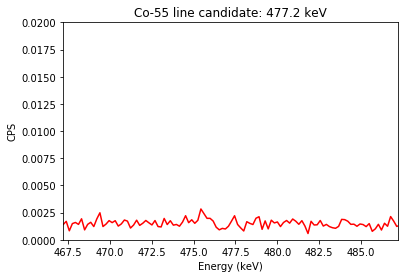

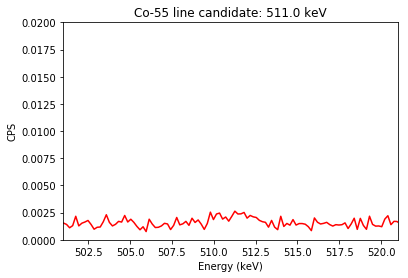

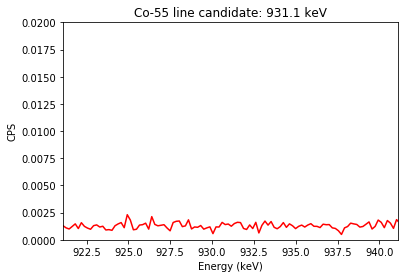

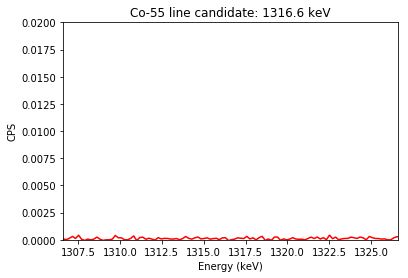

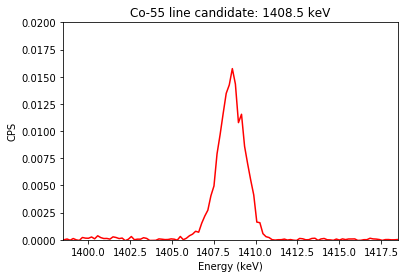

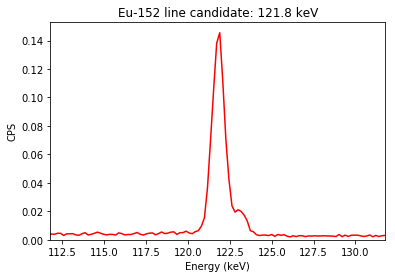

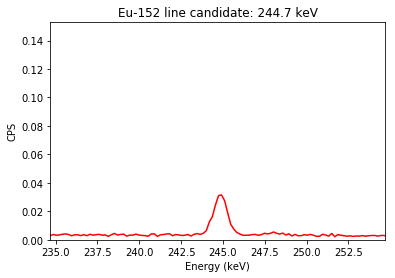

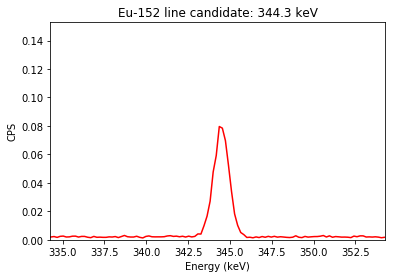

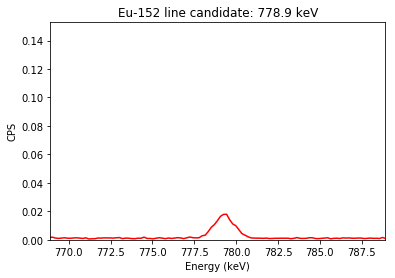

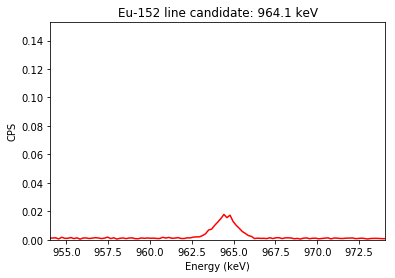

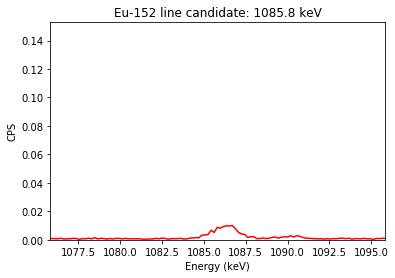

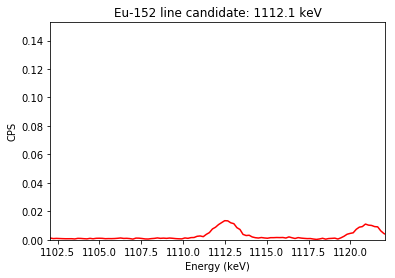

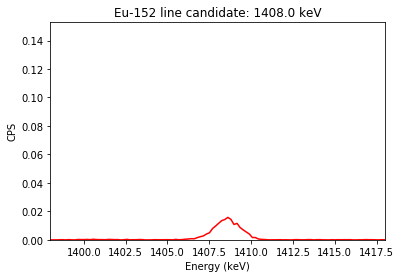

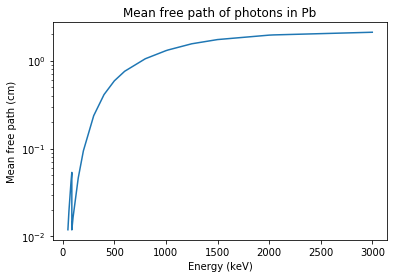

In [19]:
symbol = 'Pb'

# retrieve NIST element data
elem_dat = bq.materials.fetch_element_data()
display(elem_dat.head())
density = elem_dat.Density[elem_dat.Symbol == symbol].values[0]
print('density (g/cm^3):', density)

# retrieve NIST XCOM cross sections
xd = bq.xcom.fetch_xcom_data(symbol, e_range_kev=[50., 3000.])

# calculate mean free path
mfp_cm = 1 / (density * xd.total_wo_coh.values)

plt.figure()
plt.title('Mean free path of photons in ' + symbol)
plt.semilogy(xd.energy, mfp_cm)
plt.xlabel('Energy (keV)')
plt.ylabel('Mean free path (cm)')
plt.show()

## 2e. Mean free path of photons in air

,Material,Z_over_A,I_eV,Density,Composition_Z,Composition_symbol
0,A-150 Tissue-Equivalent Plastic,0.54903,65.1,1.127000,"[1: 0.101330, 6: 0.775498, 7: 0.035057, 8: 0.0...","[H 0.101330, C 0.775498, N 0.035057, O 0.05231..."
1,Adipose Tissue (ICRU-44),0.55579,64.8,0.950000,"[1: 0.114000, 6: 0.598000, 7: 0.007000, 8: 0.2...","[H 0.114000, C 0.598000, N 0.007000, O 0.27800..."
2,"Air, Dry (near sea level)",0.49919,85.7,0.001205,"[6: 0.000124, 7: 0.755268, 8: 0.231781, 18: 0....","[C 0.000124, N 0.755268, O 0.231781, Ar 0.012827]"
3,Alanine,0.53876,71.9,1.424000,"[1: 0.079192, 6: 0.404437, 7: 0.157213, 8: 0.3...","[H 0.079192, C 0.404437, N 0.157213, O 0.359157]"
4,B-100 Bone-Equivalent Plastic,0.52740,85.9,1.450000,"[1: 0.065473, 6: 0.536942, 7: 0.021500, 8: 0.0...","[H 0.065473, C 0.536942, N 0.021500, O 0.03208..."


density (g/cm^3): 0.0012050000000000001
composition: ['C 0.000124', 'N 0.755268', 'O 0.231781', 'Ar 0.012827']


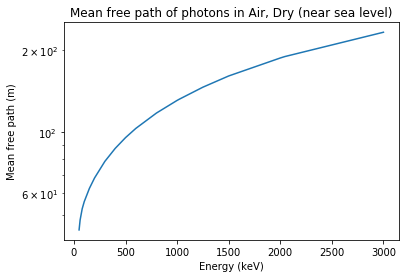

In [20]:
compound = 'Air, Dry (near sea level)'

# retrieve NIST compound data
comp_dat = bq.materials.fetch_compound_data()
display(comp_dat.head())
density = comp_dat.Density[comp_dat.Material == compound].values[0]
composition = comp_dat.Composition_symbol[comp_dat.Material == compound].values[0]
print('density (g/cm^3):', density)
print('composition:', composition)

# retrieve NIST XCOM cross sections
xd = bq.xcom.fetch_xcom_data(composition, e_range_kev=[50., 3000.])

# calculate mean free path
mfp_cm = 1 / (density * xd.total_wo_coh.values)
mfp_m = mfp_cm / 100.

plt.figure()
plt.title('Mean free path of photons in ' + compound)
plt.semilogy(xd.energy, mfp_m)
plt.xlabel('Energy (keV)')
plt.ylabel('Mean free path (m)')
plt.show()

## 2f. Activity of a 40 lb bag of KCl salt

In [21]:
# calculate number of K atoms in the sample
from scipy.constants import physical_constants
AMU = physical_constants['unified atomic mass unit'][0]

K = bq.Element('Potassium')
Cl = bq.Element('Cl')

mass = 18.1  # kg
mass_K = mass * K.atomic_mass / (K.atomic_mass + Cl.atomic_mass)
n_K = mass_K / AMU / K.atomic_mass
print('total mass: {:.2f} kg'.format(mass))
print('mass of K:  {:.2f} kg'.format(mass_K))
print('number of K nuclei: {:.2e}'.format(n_K))

total mass: 18.10 kg
mass of K:  9.49 kg
number of K nuclei: 1.46e+26


In [22]:
# calculate number of K-40 nuclei
K40 = bq.Isotope('K-40')
print('K-40 abundance: {:.4f}%'.format(K40.abundance))
n_K40 = n_K * K40.abundance.nominal_value / 100
print('number of K-40 nuclei: {:.2e}'.format(n_K40))

K-40 abundance: 0.0117+/-0.0001%
number of K-40 nuclei: 1.71e+22


In [23]:
# determine activity of K-40
# n(t) = n0 2^(-t / hl) = n0 exp(-t ln(2) / hl)
# dn/dt = -n0 ln(2) / hl exp(-t ln(2) / hl)
print('half-life: {:.3e} s'.format(K40.half_life))
print('half-life: {:.3e} y'.format(K40.half_life / (3600 * 24 * 365)))

activity_Bq = n_K40 * np.log(2) / K40.half_life  # could also use n_K40 * K40.decay_constant
print('activity: {:.2e} Bq'.format(activity_Bq))
activity_uCi = activity_Bq / 3.7e4
print('activity: {:.2e} uCi'.format(activity_uCi))

half-life: 3.938e+16 s
half-life: 1.249e+09 y
activity: 3.01e+05 Bq
activity: 8.14e+00 uCi


# 3. Features in development (contributions welcome!)

* `Spectrum.plot` method
* rebinning a `Spectrum`
* additional `Spectrum` file types (N42, CHN, CSV)
* automatic peak finding and calibration
* fitting spectral features (e.g., gaussian lines with different background models)

We meet biweekly during lunch on Tuesdays starting 4/10.